In [1]:
import pandas as pd 


In [6]:
df = pd.read_csv('Data/game_of_thrones_deaths_collecti.csv')
df.head(10)

,name,allegiance,season,episode,location,killer,killers_house,method,death_no
0,Waymar Royce,Night's Watch,1,1,Beyond the Wall,White Walker,NaN,Ice sword,1
1,Gared,Night's Watch,1,1,Beyond the Wall,White Walker,NaN,Ice sword,2
2,Will,Night's Watch,1,1,Winterfell,Ned Stark,House Stark,Sword,3
3,Stag,NaN,1,1,Winterfell,Direwolf,NaN,Teeth,4
4,Direwolf,NaN,1,1,Winterfell,Stag,NaN,Antler,5
5,Jon Arryn,House Arryn,1,1,King's Landing,Lysa Arryn,House Arryn,Poison,6
6,Dothraki man,Dothraki,1,1,Pentos,Dothraki man,Dothraki,Arakh,7
7,Catspaw assassin,NaN,1,2,Winterfell,Summer,House Stark,Teeth,8
8,Mycah,Smallfolk,1,2,Kingsroad,"Sandor ""the Hound"" Clegane",House Lannister,Sword,9
9,Lady,House Stark,1,2,Kingsroad,Ned Stark,House Stark,Knife,10


estos datos contienen todos los asesinatos que han sucedido en Juego de Tronos en cada temporada.
name: nombre de la víctima
allegiance: La alianza de la víctima
season: Temporada
espisode: Nº de episodio
location: localización
killer: asesino
killer_house: casa a la que pertenece el asesino
method: tipo de asesinato
death_no: nº de muerte en la serie


necesito saber los datos con NaN.
Si son datos string los ponemos como Desconocido
Si son datos numéricos los ponemos como 0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2224 non-null   object
 1   allegiance     1792 non-null   object
 2   season         2224 non-null   int64 
 3   episode        2224 non-null   int64 
 4   location       2224 non-null   object
 5   killer         2214 non-null   object
 6   killers_house  2194 non-null   object
 7   method         2224 non-null   object
 8   death_no       2224 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 156.5+ KB


In [9]:
df = df.fillna({"allegiance":'Desconocido',"killers_house": 'Desconocido', "killer":'Desconocido'})
df.count()


name             2224
allegiance       2224
season           2224
episode          2224
location         2224
killer           2224
killers_house    2224
method           2224
death_no         2224
dtype: int64

Me gustaría saber el número de muertes totales y también saber el número de muertes que hubo en la primera temporada.

Quiero saber el impacto de muertes de la Temporada 1 respecto al conjunto de asesinatos (personas muertas en la Temp1/muertes totales)

In [11]:
muertes_totales = df.shape[0]
muertes_totales

2224

In [14]:
muertes_temp1 = df[df.season == 1]
muertos_t1 = muertes_temp1.shape[0]
muertos_t1

58

In [19]:
Impacto_temp1 =round( muertos_t1/muertes_totales*100,2)
print(f"El impacto de muertes de la temporada 1 fue de: {Impacto_temp1}%")

El impacto de muertes de la temporada 1 fue de: 2.61%


Necesito recuperar los datos de muertes de la Temp 2 y 3, el impacto en la serie y realizar un diccionario y ponerlo en un DataFrame nuevo


In [20]:
muertes_temp2 = df[df.season == 2]
muertes_temp2 = muertes_temp2.shape[0]
muertes_temp2

130

In [21]:
muertes_temp3 = df[df.season == 3]
muertes_temp3 = muertes_temp3.shape[0]
muertes_temp3

86

In [23]:
Impacto_temp2 =round( muertes_temp2/muertes_totales*100,2)
print(f"El impacto de muertes de la temporada 2 fue de: {Impacto_temp2}%")

El impacto de muertes de la temporada 2 fue de: 5.85%


In [24]:
Impacto_temp3 =round( muertes_temp3/muertes_totales*100,2)
print(f"El impacto de muertes de la temporada 3 fue de: {Impacto_temp3}%")

El impacto de muertes de la temporada 3 fue de: 3.87%


Almacenamos los datos en un diccionario
data = {
    'Datos': ['pasajeros totales','Supervivientes', 'fallecidos']
         ,'Valores':[pasajeros,num_survived,num_fallecidos]
         }
df_estadistica= pd.DataFrame.from_dict(data)
df_estadistica

In [27]:
data = {
    'Datos': ['Impacto_temp1','Impacto_temp2', 'Impacto_temp3']
         ,'Muertes': [muertos_t1,muertes_temp2,muertes_temp3]
         ,'Valores':[Impacto_temp1,Impacto_temp2,Impacto_temp3] 
         }
df_estadistica= pd.DataFrame.from_dict(data)
df_estadistica

,Datos,Muertes,Valores
0,Impacto_temp1,58,2.61
1,Impacto_temp2,130,5.85
2,Impacto_temp3,86,3.87


realizar un gráfico para visualizar las temportadas

<Axes: xlabel='Datos'>

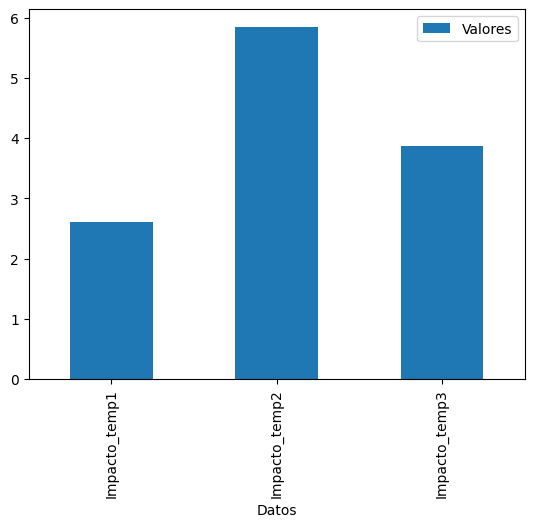

In [28]:
df_estadistica.plot(kind="bar",x="Datos", y="Valores")

No me creo etos datos, Python no es tan listo
Me gustaría visualizar el nº de muertes por temporada
Agrupar el nº de muertes por temporada.

In [29]:
df['season'].value_counts()

season
8    892
6    396
7    334
4    170
5    158
2    130
3     86
1     58
Name: count, dtype: int64

In [37]:
grupo_season= df.groupby('season')['killer']
grupo_season.describe()

,count,unique,top,freq
season,,,,
1,58,30,Lannister soldier,8
2,130,32,Baratheon of King's Landing soldier,32
3,86,27,Frey soldier,27
4,170,39,Night's Watch brother,39
5,158,30,Sons of the Harpy agent,27
6,396,36,Cersei Lannister,198
7,334,21,Daenerys Targaryen,182
8,892,18,Daenerys Targaryen,773


Agrupamos un dataFrame por asesino

In [39]:
df_killer= df.groupby('killer').sum()
df_killer

,name,allegiance,season,episode,location,killers_house,method,death_no
killer,,,,,,,,
Accident,Baratheon of Dragonstone soldier,House Baratheon of Dragonstone,2,9,King's Landing,Unknown,Blunt object,120
Aemon Targaryen,Aemon Targaryen,Night's Watch,5,7,Castle Black,Night's Watch,Old Age,511
Alliser Thorne,WildlingThenn raiderWildling,Free FolkFree FolkFree Folk,12,27,Castle BlackCastle BlackCastle Black,Night's WatchNight's WatchNight's Watch,SwordSwordSword,1089
Amory Lorch,Yoren,Night's Watch,2,3,Riverlands,House Lannister,Sword,72
Arthur Dayne,Stark soldierStark soldierStark soldier,House StarkHouse StarkHouse Stark,18,9,DorneDorneDorne,House TargaryenHouse TargaryenHouse Targaryen,SwordSwordSword,1863
...,...,...,...,...,...,...,...,...
Wildling giant,Night's Watch brotherGrenn,Night's WatchNight's Watch,8,18,The WallCastle Black,Free FolkFree Folk,Giant arrowUnknown,760
Wun Wun,Night's Watch brotherBolton soldierBolton soldier,Night's WatchHouse BoltonHouse Bolton,18,20,Castle BlackWinterfellWinterfell,Free FolkFree FolkFree Folk,HandsHandsHands,2124
Yara Greyjoy,Bolton soldierBolton soldierBolton soldierGrey...,House BoltonHouse BoltonHouse BoltonHouse Grey...,68,34,DreadfortDreadfortDreadfortThe Narrow SeaThe N...,House GreyjoyHouse GreyjoyHouse GreyjoyHouse G...,AxeAxeAxeSwordSwordSwordSwordSwordSwordSwordSword,9482


Me gustaría visualizar el assesino y el nº de muertes

In [41]:
df_killer=df.groupby('killer')['death_no'].agg(['count'])
df_killer

,count
killer,
Accident,1
Aemon Targaryen,1
Alliser Thorne,3
Amory Lorch,1
Arthur Dayne,3
...,...
Wildling giant,2
Wun Wun,3
Yara Greyjoy,11


mostrar un gráfico Pie con los 10 primeros asesinos

<Axes: ylabel='count'>

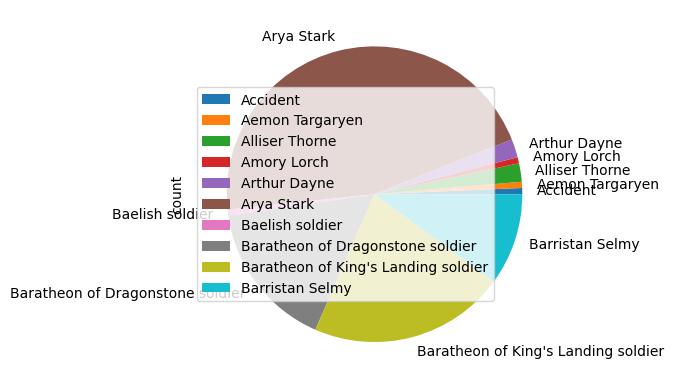

In [45]:
df_primeros=df_killer.head(10)
df_primeros.groupby('killer').sum().plot(kind='pie', y='count')


1) Queremos saber el nº de muertes de Daenerys Targaryen
2) Mostrar las muertes de Daenerys Targaryen en un dataFrame
3) Visualizar las muertes de Daenerys Targaryen por Temporada
4) Mostrar la evolución de nuestra asesina por temporada en un gráfico de barras.

In [46]:
Dan_muertes = df[df.killer == 'Daenerys Targaryen']
muertes_dan = Dan_muertes.shape[0]
muertes_dan

1008

In [47]:
Dan_muertes = df[df.killer == 'Daenerys Targaryen']
Dan_muertes

,name,allegiance,season,episode,location,killer,killers_house,method,death_no
56,Khal Drogo,Dothraki,1,10,Red Waste,Daenerys Targaryen,House Targaryen,Pillow,57
57,Mirri Maz Duur,Desconocido,1,10,Red Waste,Daenerys Targaryen,House Targaryen,Fire,58
184,Pyat Pree,Warlocks of Qarth,2,10,Qarth,Daenerys Targaryen,House Targaryen,Dragonfire (Dragon),185
186,Xaro Xhoan Daxos,The Thirteen,2,10,Qarth,Daenerys Targaryen,House Targaryen,Sealed into vault,187
187,Doreah,House Targaryen,2,10,Qarth,Daenerys Targaryen,House Targaryen,Sealed into vault,188
...,...,...,...,...,...,...,...,...,...
2207,King's Landing Citizen,Desconocido,8,5,King's Landing,Daenerys Targaryen,House Targaryen,Dragonfire (Dragon),2208
2208,King's Landing Citizen,Desconocido,8,5,King's Landing,Daenerys Targaryen,House Targaryen,Dragonfire (Dragon),2209
2209,King's Landing Citizen,Desconocido,8,5,King's Landing,Daenerys Targaryen,House Targaryen,Dragonfire (Dragon),2210
2221,Jaime Lannister,House Lannister,8,5,King's Landing,Daenerys Targaryen,House Targaryen,Rubble,2222


In [54]:
grupo_Dan= Dan_muertes.groupby('season')['death_no'].agg(['count'])
grupo_Dan

,count
season,
1,2
2,3
3,1
4,2
5,18
6,27
7,182
8,773


<Axes: ylabel='count'>

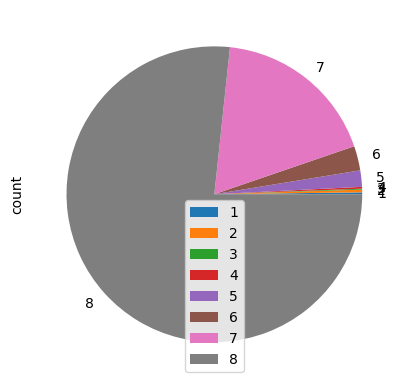

In [56]:

Dan_muertes.groupby('season')['death_no'].agg(['count']).plot(kind='pie', y='count')